In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
import matplotlib.pyplot as plt

## Definición del modelo inflacionario y obtención de los datos del background

In [2]:
#KKLT inflation 

V = 'V_0*(phi**2/(phi**2 + m**2))'
parameters = {'V_0' : 0.79e-10, 'm' : 0.5}
potential = PotentialFunction.from_string(V, param_values=parameters) #Instancia de la clase Potential para el modelo R^2

#Creando instancia de la clase Background. Resuelve automáticamente el sistema dada la condición inicial del inflatón
background = Background(potential, phi0 = 3.4) 

In [3]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = (background.data[i] for i in vars)
Nend = background.N_end
Nend

71.11111111111111

Figure saved as: figures/potential.png


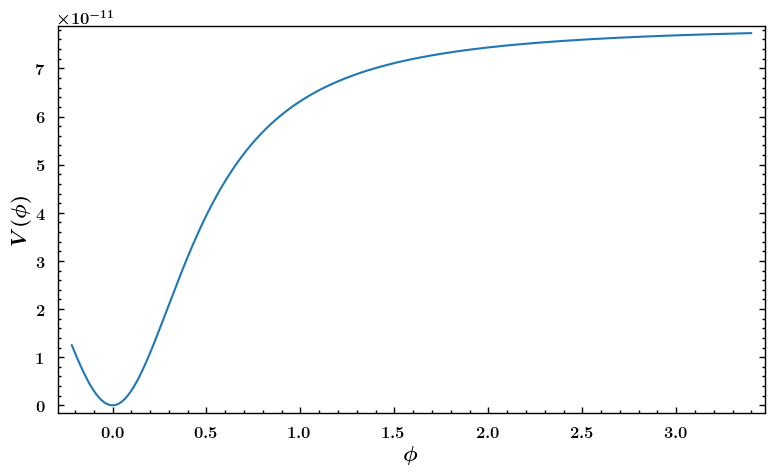

In [4]:
potential.plot_potential(min(phi), max(phi), dpi= 100, save = True)


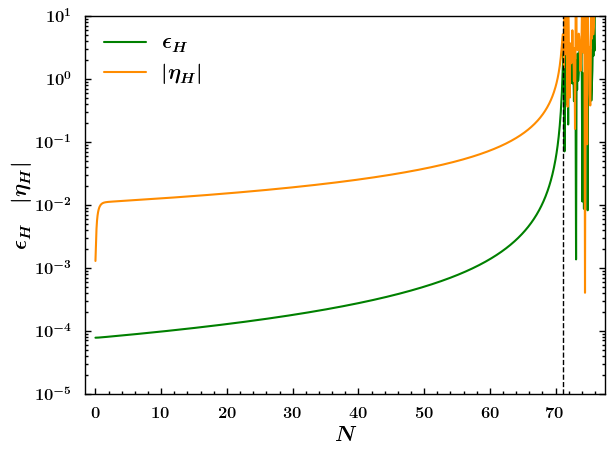

In [5]:
plt.plot(N, eps_H, label = r'$\epsilon_H$', color = 'green' )
plt.plot(N, abs(eta_H), label = r'$|\eta_H |$', color = 'darkorange')
plt.axvline(Nend, color = 'k', linestyle = 'dashed', linewidth= 1)

plt.yscale('log')
plt.ylim(1e-5, 10)
plt.xlabel(r'$N$')
plt.ylabel(r'$\epsilon_H\quad |\eta_H|$')
plt.legend(loc = 'best')
#plt.title('Slow-roll parameters')
plt.tight_layout()
plt.show()

In [6]:
pert = Perturbations(potential, background, scale= 'CMB', N_CMB = 50)
k_pivot = pert.k_CMB
Npivot = pert.N_hc(k = k_pivot)
Nin = pert.N_ini(k = k_pivot)
print(f'El modo {k_pivot} cruza el horizonte a {Npivot[0]} e-folds')
sol = pert.solver()

El modo 0.05 cruza el horizonte a 21.11111111111112 e-folds


In [7]:
pert.N_hc()

[(14.111111111111112, 4.563219826022292e-05),
 (14.16413226006758, 4.811668610443322e-05),
 (14.217153535736507, 5.0736444220148476e-05),
 (14.27017467386233, 5.3498837524204735e-05),
 (14.323195855766787, 5.641163192324491e-05),
 (14.37621715319911, 5.948301614598436e-05),
 (14.429238310580264, 6.272162476415573e-05),
 (14.48225952579753, 6.613656246685008e-05),
 (14.535280844655494, 6.973742965649795e-05),
 (14.58830202182774, 7.353434943844653e-05),
 (14.64132327065521, 7.753799608001071e-05),
 (14.694344610636849, 8.17596250190033e-05),
 (14.747365808172441, 8.621110450610862e-05),
 (14.800387090840074, 9.090494897005322e-05),
 (14.85340845167852, 9.585435419937628e-05),
 (14.906429670191482, 0.00010107323443970354),
 (14.959450986860842, 0.00010657626151081772),
 (15.012472368324255, 0.00011237890605349399),
 (15.065493608466904, 0.00011849748102205814),
 (15.118514959230836, 0.00012494918754493822),
 (15.171536361125675, 0.00013175216328213722),
 (15.224557623589849, 0.0001389255

In [8]:
pert.N_ini()

[10.111111111111112,
 10.16413226006758,
 10.217153535736507,
 10.27017467386233,
 10.323195855766787,
 10.37621715319911,
 10.429238310580264,
 10.48225952579753,
 10.535280844655494,
 10.58830202182774,
 10.64132327065521,
 10.694344610636849,
 10.747365808172441,
 10.800387090840074,
 10.85340845167852,
 10.906429670191482,
 10.959450986860842,
 11.012472368324255,
 11.065493608466904,
 11.118514959230836,
 11.171536361125675,
 11.224557623589849,
 11.277579008473483,
 11.330600430639365,
 11.383621716156911,
 11.436643135115531,
 11.489664577430139,
 11.542685886772798,
 11.59570733969364,
 11.648728802070073,
 11.701750136049462,
 11.75477162275006,
 11.807793105138147,
 11.86081446460623,
 11.913835984834812,
 11.966857487221,
 12.01987887306992,
 12.072900426504201,
 12.125921948912328,
 12.178943362075103,
 12.231964948323345,
 12.28498649081358,
 12.338007932263775,
 12.391029550863799,
 12.444051113533732,
 12.497072584285881,
 12.55009423470489,
 12.603115817689446,
 12.6561

In [9]:
#Extrayendo datos de la clase perturbations

variables = ['N', 'R_re', 'dRdN_re','R_im', 'dRdN_im', 
                'h_re', 'dhdN_re', 'h_im', 'dhdN_im','P_s', 'P_t', 'P_s_pivot', 'P_t_pivot', 'r_pivot']
N, R_re, dRdN_re, R_im, dRdN_im, h_re, dhdN_re, h_im, dhdN_im, P_s, P_t, P_s_pivot, P_t_pivot, r_pivot = (pert.data[i] for i in variables)


In [10]:
P_s_pivot, P_t_pivot, r_pivot

(2.5187581991664856e-09, 5.200229224451172e-12, 0.0020646004154634794)

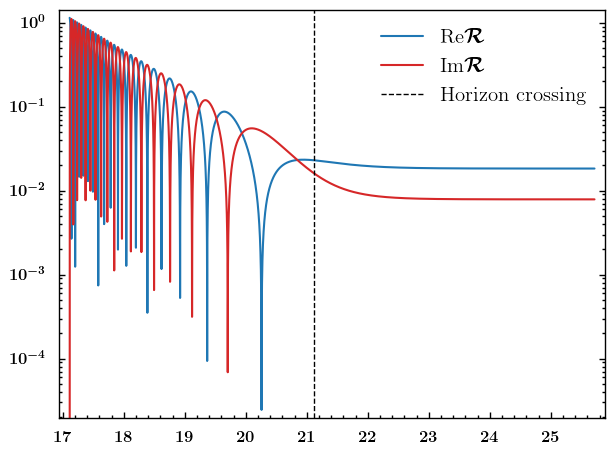

In [11]:
plt.semilogy(N, abs(R_re), label = r'$\text{Re}\mathcal{R}$')
plt.semilogy(N, abs(R_im), label = r'$\text{Im}\mathcal{R}$')
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')
plt.tight_layout()
plt.legend()


In [12]:
PS = pert.Power_spectrum(save= True)

/Users/flaviopineda/Desktop/Code/Python/Physics/Proyects/PrimordialPy:/primordialpy/perturbations.py:480: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'best')


Figure saved as: figures/spectrum_scalar.png


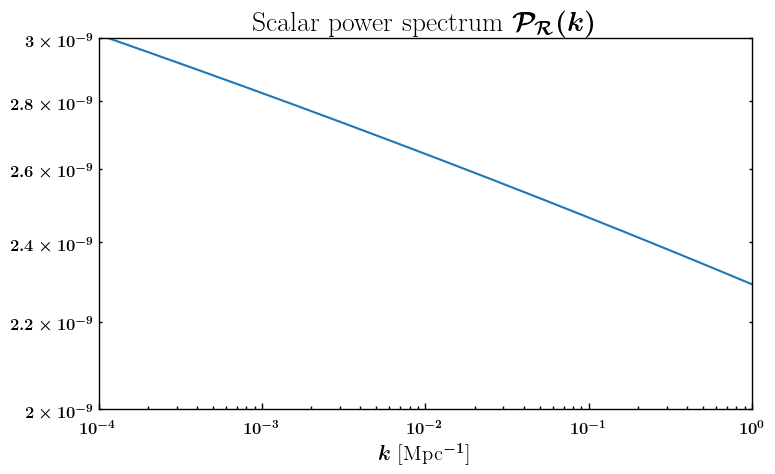

In [13]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar', save=True)

Figure saved as: figures/tensor_to_scalar_ratio.png


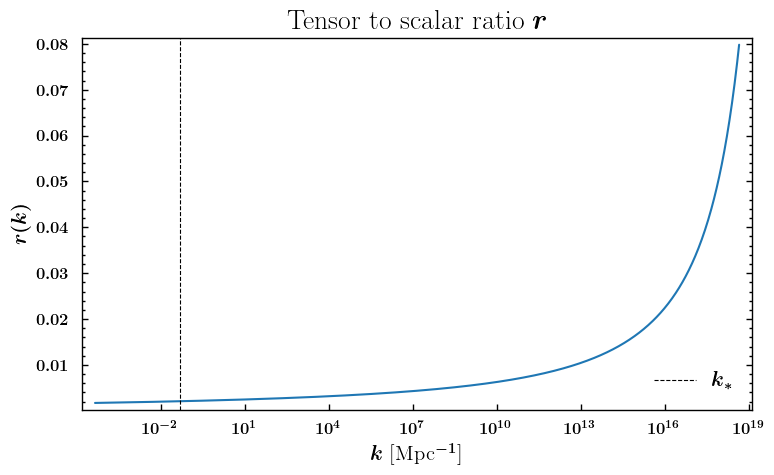

In [14]:
pert.Plot_r(dpi = 100, save=True)

In [15]:
print(pert.Spectral_tilts)


{'n_s': 0.9695037013411855, 'n_t': -0.0002654725633667778}
